In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import linregress

In [2]:
#read in csv and create dataframe
movie_df = pd.read_csv("group_project/Output/no_lie_for_real_left_off_here.csv")
movie_df.dtypes

Title               object
Year                 int64
Rated               object
Released            object
Runtime            float64
Genre               object
Director            object
Writer              object
Actors              object
Plot                object
Metascore          float64
imdbRating         float64
Rotten Tomatoes    float64
imdbVotes           object
BoxOffice           object
dtype: object

In [3]:
#get list of runtimes for grouping and cleaning purposes
movie_df['Runtime'].unique()

array([165., 111., 135., 137.,  91., 132., 134., 127., 123., 109., 120.,
       122.,  93., 100., 157.,  95.,  90., 128., 106., 118., 150., 209.,
        94., 104., 162., 121.,  96., 129., 177., 103., 140., 113., 119.,
       126.,  82., 197., 117., 101., 108., 107.,  74.,  99., 148.,  89.,
        92., 180., 130.,  75., 138., 115.,  72.,  98., 102., 125., 136.,
        88., 196., 185., 114., 146., 133.,  85.,  87.,  78.,  86., 141.,
       124., 105., 147., 230.,  83., 188., 110.,  80.,  76.,  84., 139.,
        70., 145., 152., 143., 144., 161.,  79., 116.,  97.,  71.,  23.,
       173., 112., 131.,  81., 142., 164.,  77., 163., 155.,  69., 149.,
       174., 238., 181., 156.,  73.,  63., 169.,  66., 151., 168., 158.,
       231., 153., 189., 154., 172., 159., 179.,  55.,  60.,  68., 178.,
       166., 160., 171., 170., 167., 176., 186., 208., 183., 184.,  17.,
       182.,  64.,  nan,  61.,  65.,  50.,  16.,  44.,  67.,   6.,  20.,
        15.,  12.,   9.,   5.,  62.,  14.,  11.])

In [78]:
#remove movies with run time under an hour
movie_60 = movie_df.loc[movie_df['Runtime'] > 59]
movie_60['Runtime'].unique()

array([165., 111., 135., 137.,  91., 132., 134., 127., 123., 109., 120.,
       122.,  93., 100., 157.,  95.,  90., 128., 106., 118., 150., 209.,
        94., 104., 162., 121.,  96., 129., 177., 103., 140., 113., 119.,
       126.,  82., 197., 117., 101., 108., 107.,  74.,  99., 148.,  89.,
        92., 180., 130.,  75., 138., 115.,  72.,  98., 102., 125., 136.,
        88., 196., 185., 114., 146., 133.,  85.,  87.,  78.,  86., 141.,
       124., 105., 147., 230.,  83., 188., 110.,  80.,  76.,  84., 139.,
        70., 145., 152., 143., 144., 161.,  79., 116.,  97.,  71., 173.,
       112., 131.,  81., 142., 164.,  77., 163., 155.,  69., 149., 174.,
       238., 181., 156.,  73.,  63., 169.,  66., 151., 168., 158., 231.,
       153., 189., 154., 172., 159., 179.,  60.,  68., 178., 166., 160.,
       171., 170., 167., 176., 186., 208., 183., 184., 182.,  64.,  61.,
        65.,  67.,  62.])

In [152]:
cleaned_movie = movie_60[movie_60['imdbRating'].notna()]

/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_47204/2130955762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)
/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_47204/2130955762.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()


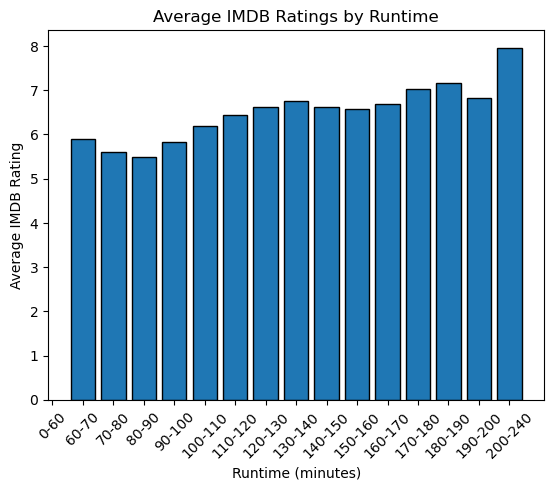

In [153]:
bins = [0, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 240]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Cut the 'Runtime' into bins
cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)

# Calculate the average rating for each bin
average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()

# Plotting the average ratings
plt.bar(average_ratings.index, average_ratings.values, edgecolor='black')

# Add titles and labels
plt.title('Average IMDB Ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_47204/3264824112.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = movie_180.groupby('Runtime Group')['imdbRating'].mean()


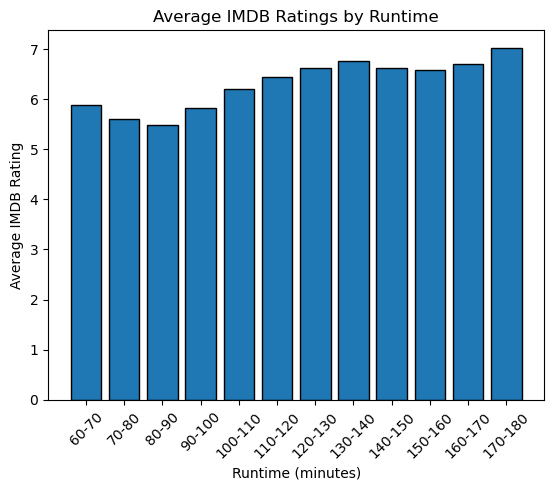

In [154]:
#Establish bins and labels for bins
bins = [0, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Cut the 'Runtime' into bins
movie_180['Runtime Group'] = pd.cut(movie_180['Runtime'], bins=bins, labels=labels, right=False)

# Calculate the average rating for each bin
average_ratings = movie_180.groupby('Runtime Group')['imdbRating'].mean()

# Plotting the average ratings
plt.bar(average_ratings.index, average_ratings.values, edgecolor='black')

# Add titles and labels
plt.title('Average IMDB Ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

In [155]:
#cut out movies over 180 minutes
movie_180 = cleaned_movie.loc[cleaned_movie['Runtime'] < 180]

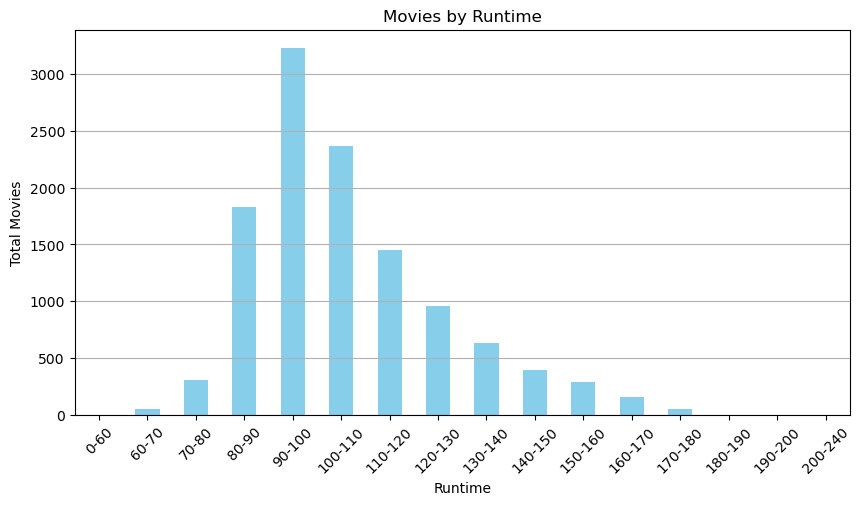

In [158]:
#Make a Bar graph of movies per each runtime

# count occurences of runtime for each group
runtime_counts = movie_180['Runtime Group'].value_counts()

# Sort the index (runtime groups) to ensure they are in order
runtime_counts = runtime_counts.sort_index()

# Create a bar plot
runtime_counts.plot(kind='bar', figsize=(10, 5), color='skyblue', rot=45)

# Set the title and labels
plt.title('Movies by Runtime')
plt.xlabel('Runtime')
plt.ylabel('Total Movies')

# Show grid
plt.grid(axis='y')

# Display the plot
plt.show()

/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_47204/818640295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)
/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_47204/818640295.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()


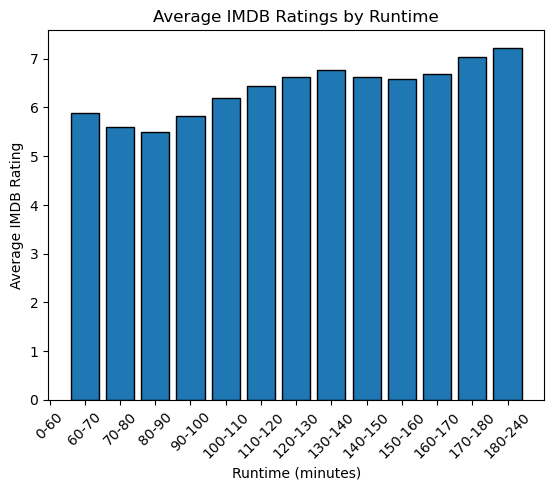

In [159]:
#Establish bins and labels for bins
bins = [0, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 240]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Cut the 'Runtime' into bins
cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)

# Calculate the average rating for each bin
average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()

# Plotting the average ratings
plt.bar(average_ratings.index, average_ratings.values, edgecolor='black')

# Add titles and labels
plt.title('Average IMDB Ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_47204/3522306480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)
/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_47204/3522306480.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()


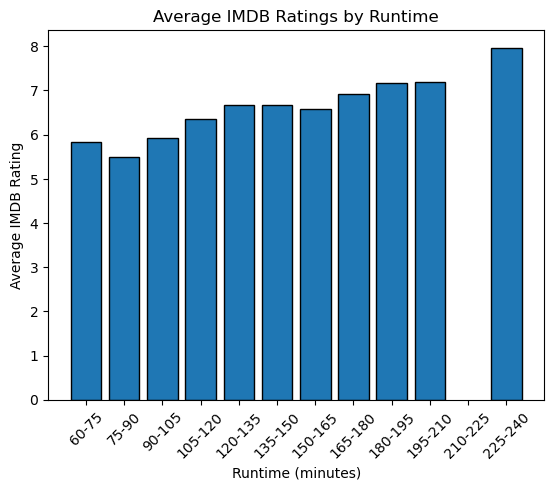

In [160]:
bins = [0, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Cut the 'Runtime' into bins
cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)

# Calculate the average rating for each bin
average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()

# Plotting the average ratings
plt.bar(average_ratings.index, average_ratings.values, edgecolor='black')

# Add titles and labels
plt.title('Average IMDB Ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

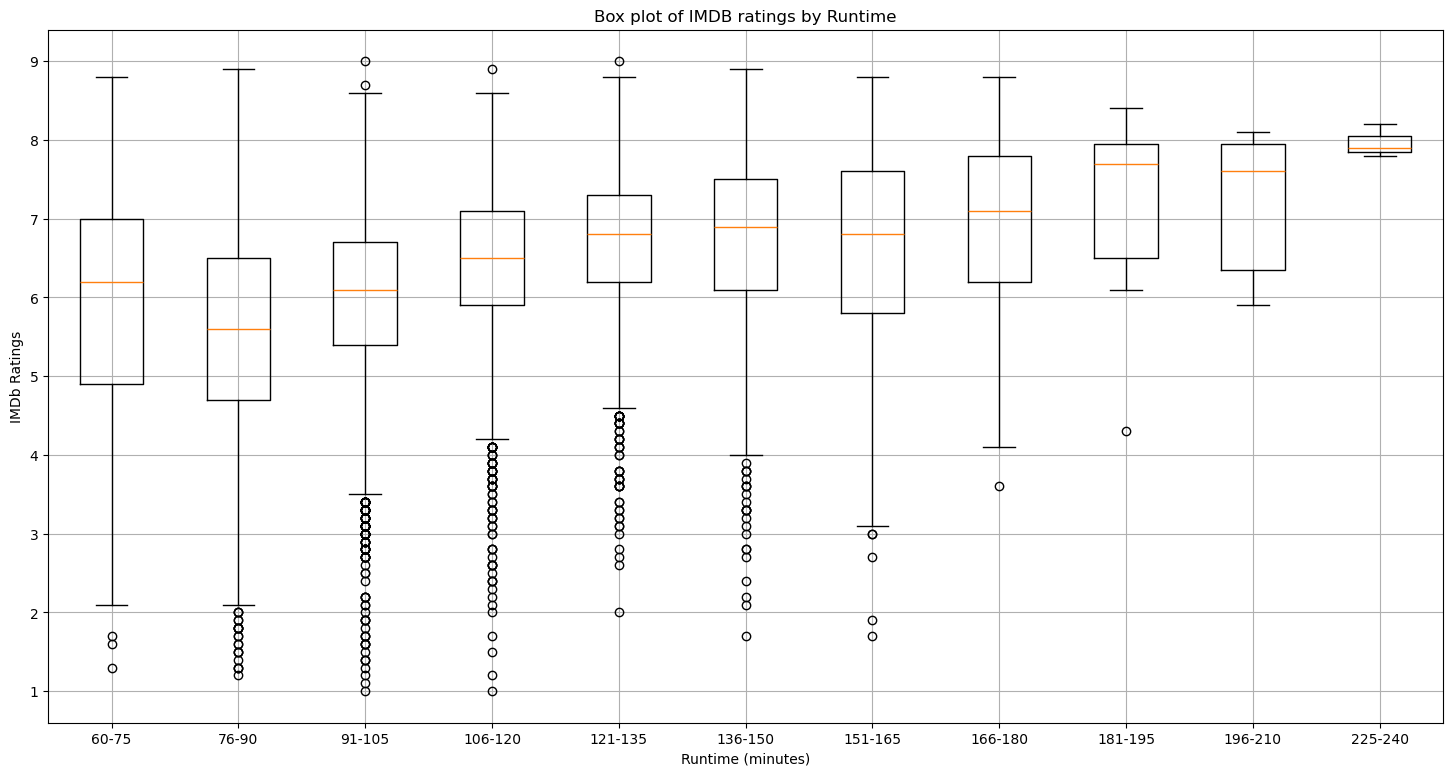

In [161]:
#separate movies into groups by runtime
runtime_0 = cleaned_movie[(cleaned_movie['Runtime'] >= 60) & (cleaned_movie['Runtime'] <= 75)]
runtime_1 = cleaned_movie[(cleaned_movie['Runtime'] >=76) & (cleaned_movie['Runtime'] <= 90)]
runtime_2 = cleaned_movie[(cleaned_movie['Runtime'] >=91) & (cleaned_movie['Runtime']<= 105)]
runtime_3 = cleaned_movie[(cleaned_movie['Runtime'] >=106) & (cleaned_movie['Runtime']<= 120)]
runtime_4 = cleaned_movie[(cleaned_movie['Runtime'] >=121) & (cleaned_movie['Runtime']<= 135)]
runtime_5 = cleaned_movie[(cleaned_movie['Runtime'] >=136) & (cleaned_movie['Runtime']<= 150)]
runtime_6 = cleaned_movie[(cleaned_movie['Runtime'] >=151) & (cleaned_movie['Runtime']<= 165)]
runtime_7 = cleaned_movie[(cleaned_movie['Runtime'] >=166) & (cleaned_movie['Runtime']<= 180)]
runtime_8 = cleaned_movie[(cleaned_movie['Runtime'] >=181) & (cleaned_movie['Runtime']<= 195)]
runtime_9 = cleaned_movie[(cleaned_movie['Runtime'] >=196) & (cleaned_movie['Runtime']<= 210)]
runtime_10 = cleaned_movie[(cleaned_movie['Runtime'] >=225) & (cleaned_movie['Runtime']<= 240)]

#grab IMDB Rating for all movies in each runtime group
group0 = runtime_0['imdbRating']
group1 = runtime_1['imdbRating']
group2 = runtime_2['imdbRating']
group3 = runtime_3['imdbRating']
group4 = runtime_4['imdbRating']
group5 = runtime_5['imdbRating']
group6 = runtime_6['imdbRating']
group7 = runtime_7['imdbRating']
group8 = runtime_8['imdbRating']
group9 = runtime_9['imdbRating']
group10 = runtime_10['imdbRating']

#put all groups into one list
ratings_groups = [
    group0,
    group1,
    group2,
    group3,
    group4,
    group5,
    group6,
    group7,
    group8,
    group9,
    group10
]
#create boxplot
plt.figure(figsize=(18,9))
plt.boxplot(ratings_groups, labels=[
    '60-75', '76-90', '91-105', '106-120',
    '121-135', '136-150', '151-165', '166-180',
    '181-195', '196-210', '225-240'
])
plt.title('Box plot of IMDB ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Ratings')
plt.grid(True)
plt.show()


In [162]:
#run ANOVA test at p_value .05
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

F_onewayResult(statistic=153.8600123461102, pvalue=1.0242247074302024e-304)

In [163]:
#separate movies into groups by runtime
alt_runtime_0 = cleaned_movie[(cleaned_movie['Runtime'] >= 60) & (cleaned_movie['Runtime'] <= 75)]
alt_runtime_1 = cleaned_movie[(cleaned_movie['Runtime'] >=76) & (cleaned_movie['Runtime'] <= 90)]
alt_runtime_2 = cleaned_movie[(cleaned_movie['Runtime'] >=91) & (cleaned_movie['Runtime']<= 105)]
alt_runtime_3 = cleaned_movie[(cleaned_movie['Runtime'] >=106) & (cleaned_movie['Runtime']<= 120)]
alt_runtime_4 = cleaned_movie[(cleaned_movie['Runtime'] >=121) & (cleaned_movie['Runtime']<= 135)]
alt_runtime_5 = cleaned_movie[(cleaned_movie['Runtime'] >=136) & (cleaned_movie['Runtime']<= 150)]
alt_runtime_6 = cleaned_movie[(cleaned_movie['Runtime'] >=151) & (cleaned_movie['Runtime']<= 165)]
alt_runtime_7 = cleaned_movie[(cleaned_movie['Runtime'] >=166) & (cleaned_movie['Runtime']<= 180)]
alt_runtime_8 = cleaned_movie[(cleaned_movie['Runtime'] >=181) & (cleaned_movie['Runtime']<= 240)]

#grab IMDB Rating for all movies in each runtime group
alt_group0 = alt_runtime_0['imdbRating']
alt_group1 = alt_runtime_1['imdbRating']
alt_group2 = alt_runtime_2['imdbRating']
alt_group3 = alt_runtime_3['imdbRating']
alt_group4 = alt_runtime_4['imdbRating']
alt_group5 = alt_runtime_5['imdbRating']
alt_group6 = alt_runtime_6['imdbRating']
alt_group7 = alt_runtime_7['imdbRating']
alt_group8 = alt_runtime_8['imdbRating']

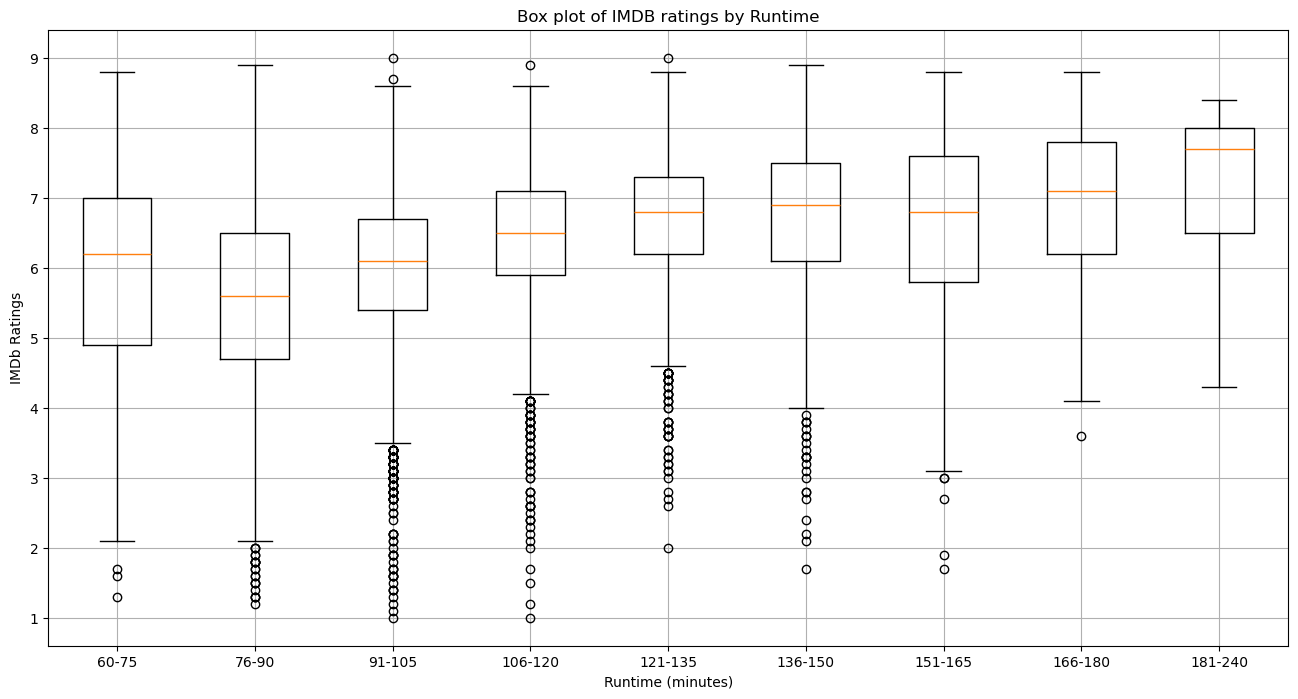

In [164]:
#put all groups into one list
ratings_groups = [
    alt_group0,
    alt_group1,
    alt_group2,
    alt_group3,
    alt_group4,
    alt_group5,
    alt_group6,
    alt_group7,
    alt_group8
]
#create boxplot
plt.figure(figsize=(16,8))
plt.boxplot(ratings_groups, labels=[
    '60-75', '76-90', '91-105', '106-120',
    '121-135', '136-150', '151-165', '166-180',
    '181-240'
])
plt.title('Box plot of IMDB ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Ratings')
plt.grid(True)
plt.show()

In [165]:
#run ANOVA test at p_value .05
stats.f_oneway(alt_group0, alt_group1, alt_group2, alt_group3, alt_group4, alt_group5, alt_group6, alt_group7, alt_group8)

F_onewayResult(statistic=192.1842766628, pvalue=9.799095481226186e-307)

In [166]:
#separate movies into groups by 10 minute increments excluding movies longer than 180 minutes
reduced_runtime_0 = cleaned_movie[(cleaned_movie['Runtime'] >= 60) & (cleaned_movie['Runtime'] <= 70)]
reduced_runtime_1 = cleaned_movie[(cleaned_movie['Runtime'] >=71) & (cleaned_movie['Runtime'] <= 80)]
reduced_runtime_2 = cleaned_movie[(cleaned_movie['Runtime'] >=81) & (cleaned_movie['Runtime']<= 90)]
reduced_runtime_3 = cleaned_movie[(cleaned_movie['Runtime'] >=91) & (cleaned_movie['Runtime']<= 100)]
reduced_runtime_4 = cleaned_movie[(cleaned_movie['Runtime'] >=101) & (cleaned_movie['Runtime']<= 110)]
reduced_runtime_5 = cleaned_movie[(cleaned_movie['Runtime'] >=111) & (cleaned_movie['Runtime']<= 120)]
reduced_runtime_6 = cleaned_movie[(cleaned_movie['Runtime'] >=121) & (cleaned_movie['Runtime']<= 130)]
reduced_runtime_7 = cleaned_movie[(cleaned_movie['Runtime'] >=131) & (cleaned_movie['Runtime']<= 140)]
reduced_runtime_8 = cleaned_movie[(cleaned_movie['Runtime'] >=141) & (cleaned_movie['Runtime']<= 150)]
reduced_runtime_9 = cleaned_movie[(cleaned_movie['Runtime'] >=151) & (cleaned_movie['Runtime']<= 160)]
reduced_runtime_10 = cleaned_movie[(cleaned_movie['Runtime'] >=161) & (cleaned_movie['Runtime']<= 170)]
reduced_runtime_11 = cleaned_movie[(cleaned_movie['Runtime'] >=171) & (cleaned_movie['Runtime']<= 180)]


#grab IMDB Rating for all movies in each runtime group
reduced_group0 = reduced_runtime_0['imdbRating']
reduced_group1 = reduced_runtime_1['imdbRating']
reduced_group2 = reduced_runtime_2['imdbRating']
reduced_group3 = reduced_runtime_3['imdbRating']
reduced_group4 = reduced_runtime_4['imdbRating']
reduced_group5 = reduced_runtime_5['imdbRating']
reduced_group6 = reduced_runtime_6['imdbRating']
reduced_group7 = reduced_runtime_7['imdbRating']
reduced_group8 = reduced_runtime_8['imdbRating']
reduced_group9 = reduced_runtime_9['imdbRating']
reduced_group10 = reduced_runtime_10['imdbRating']
reduced_group11 = reduced_runtime_11['imdbRating']

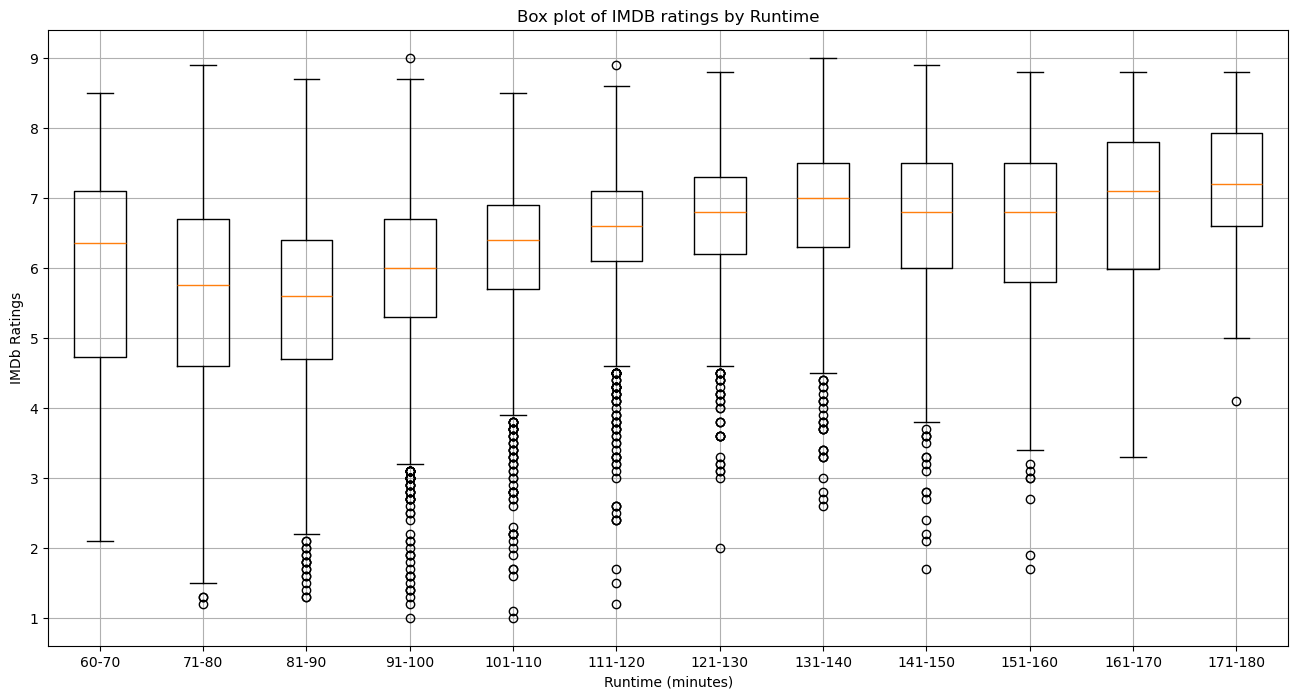

In [167]:
#put all groups into one list
ratings_groups = [
    reduced_group0,
    reduced_group1,
    reduced_group2,
    reduced_group3,
    reduced_group4,
    reduced_group5,
    reduced_group6,
    reduced_group7,
    reduced_group8,
    reduced_group9,
    reduced_group10,
    reduced_group11
]
#create boxplot
plt.figure(figsize=(16,8))
plt.boxplot(ratings_groups, labels=[
    '60-70', '71-80', '81-90', '91-100',
    '101-110', '111-120', '121-130', '131-140',
    '141-150', '151-160', '161-170', '171-180'
])
plt.title('Box plot of IMDB ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Ratings')
plt.grid(True)
plt.show()

In [168]:
#run ANOVA test at p_value .05
stats.f_oneway(reduced_group0, reduced_group1, reduced_group2, reduced_group3, reduced_group4, reduced_group5, reduced_group6,
    reduced_group7, reduced_group8, reduced_group9, reduced_group10,reduced_group11)

F_onewayResult(statistic=143.4345385114274, pvalue=4.6663005227817e-311)

In [171]:
#separate movies into groups by 30 minute increments
thirty_runtime_0 = cleaned_movie[(cleaned_movie['Runtime'] >= 60) & (cleaned_movie['Runtime'] <= 90)]
thirty_runtime_1 = cleaned_movie[(cleaned_movie['Runtime'] >=91) & (cleaned_movie['Runtime'] <= 120)]
thirty_runtime_2 = cleaned_movie[(cleaned_movie['Runtime'] >=121) & (cleaned_movie['Runtime']<= 150)]
thirty_runtime_3 = cleaned_movie[(cleaned_movie['Runtime'] >=151) & (cleaned_movie['Runtime']<= 180)]
thirty_runtime_4 = cleaned_movie[(cleaned_movie['Runtime'] >=181) & (cleaned_movie['Runtime']<= 210)]
thirty_runtime_5 = cleaned_movie[(cleaned_movie['Runtime'] >=211) & (cleaned_movie['Runtime']<= 240)]


#grab IMDB Rating for all movies in each runtime group and drop Non numbers
thirty_group0 = thirty_runtime_0['imdbRating']
thirty_group1 = thirty_runtime_1['imdbRating']
thirty_group2 = thirty_runtime_2['imdbRating']
thirty_group3 = thirty_runtime_3['imdbRating']
thirty_group4 = thirty_runtime_4['imdbRating']
thirty_group5 = thirty_runtime_5['imdbRating']

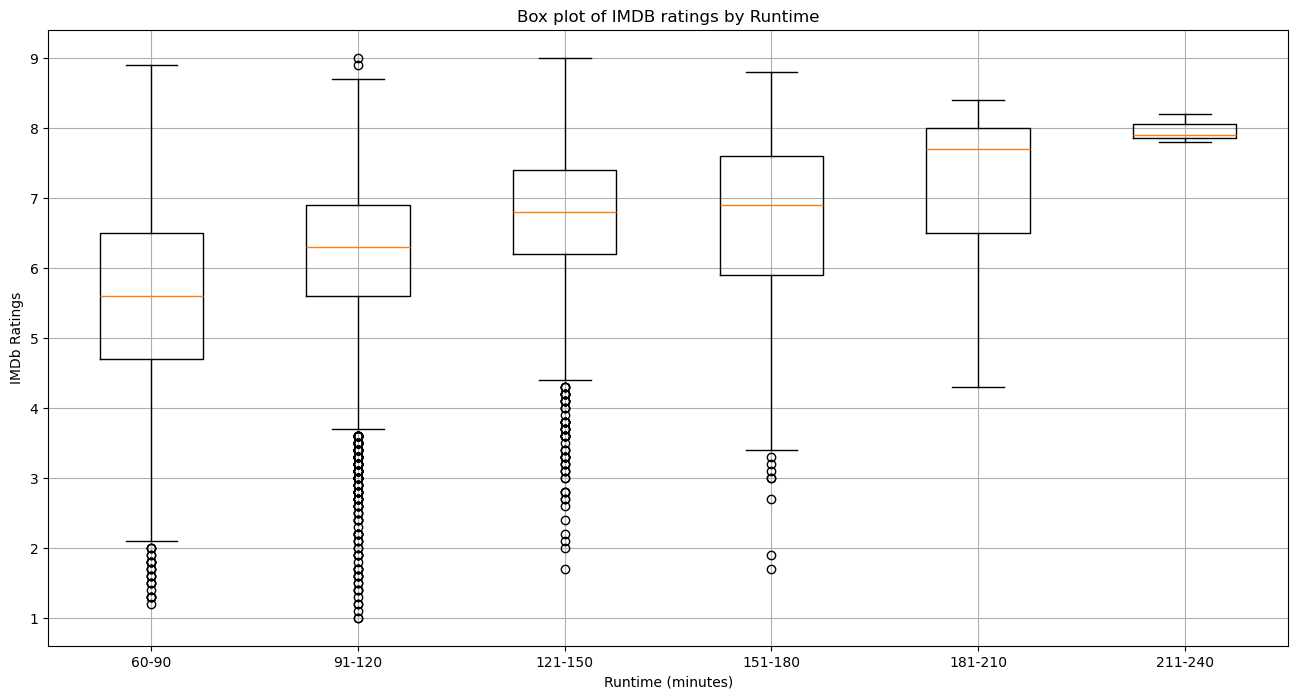

In [172]:
#put all groups into one list
ratings_groups = [
    thirty_group0,
    thirty_group1,
    thirty_group2,
    thirty_group3,
    thirty_group4,
    thirty_group5
]
#create boxplot
plt.figure(figsize=(16,8))
plt.boxplot(ratings_groups, labels=['60-90', '91-120', '121-150', '151-180',
                                   '181-210', '211-240'])
plt.title('Box plot of IMDB ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Ratings')
plt.grid(True)
plt.show()

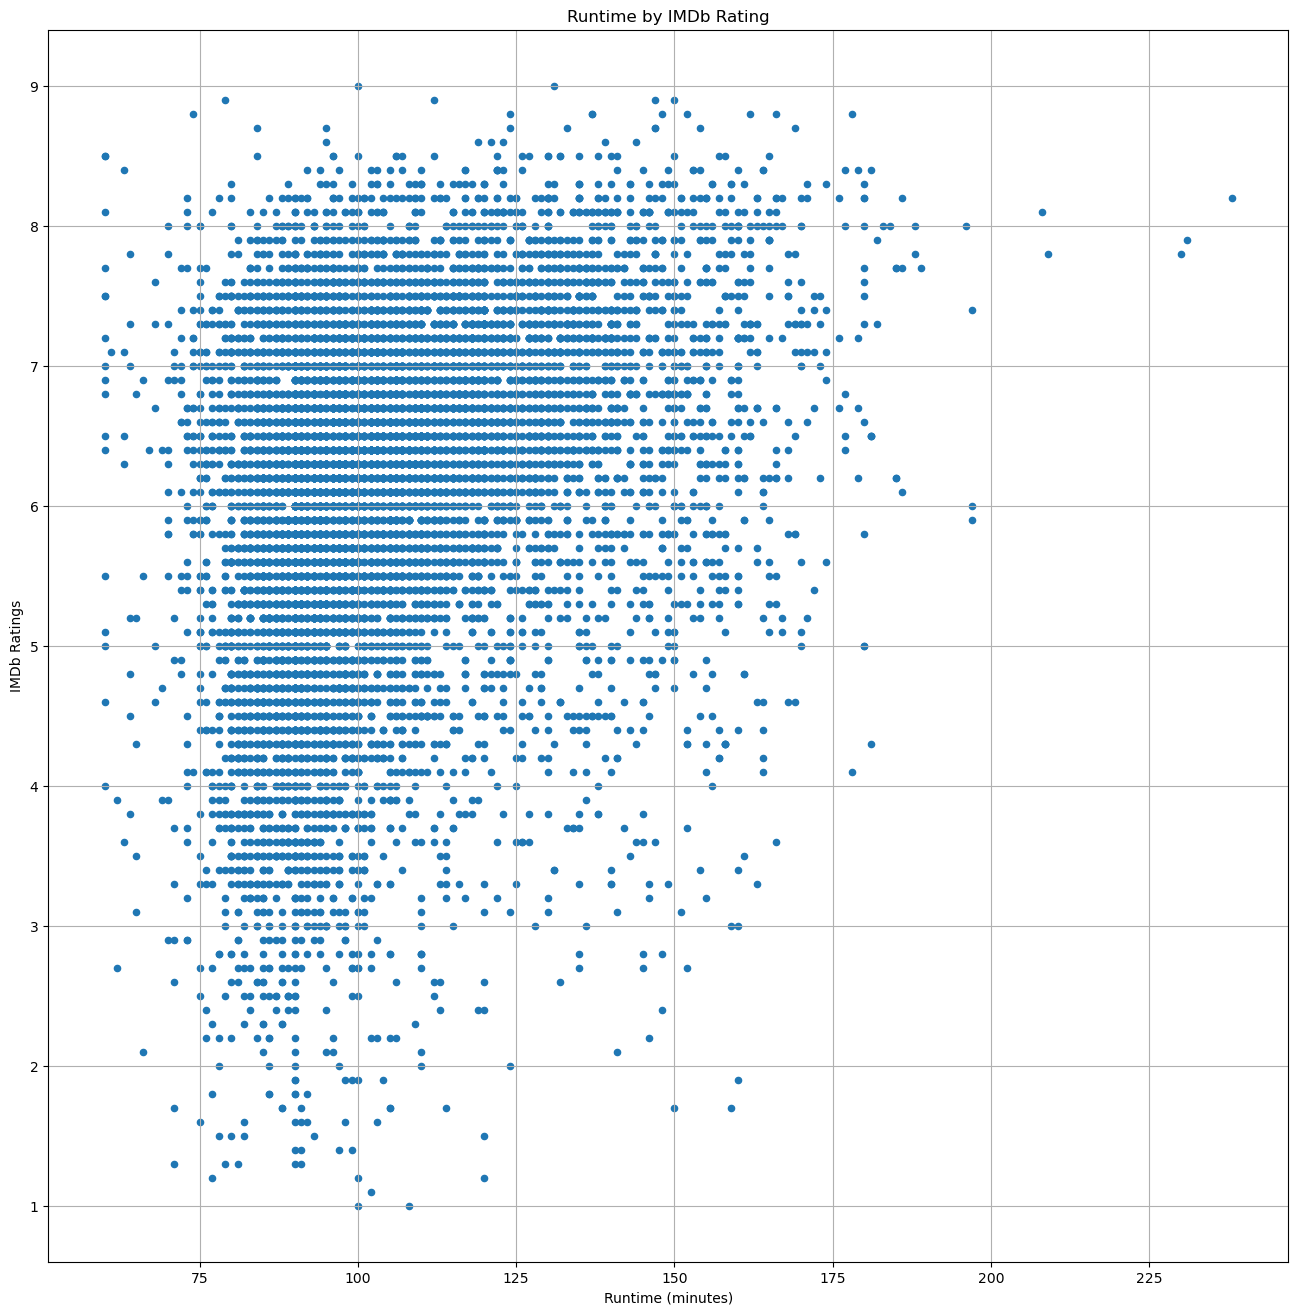

In [173]:
#Make scatter plot of the data
cleaned_movie.plot(kind='scatter', x='Runtime', y='imdbRating', grid=True, figsize=(16, 16), 
                  title='Runtime by IMDb Rating')

# Incorporate the other graph properties
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDb Ratings")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The r-squared value is 0.10026752760174845


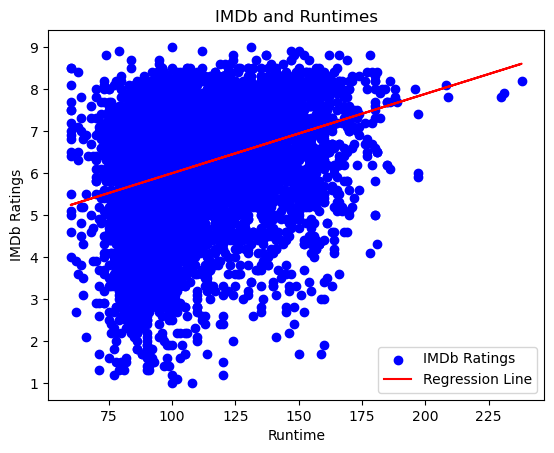

In [174]:
x_values = final_movie['Runtime']
y_values = final_movie['imdbRating']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', label="IMDb Ratings")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.xlabel("Runtime")
plt.ylabel("IMDb Ratings")
plt.title("IMDb and Runtimes")
print(f"The r-squared value is {r_value**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (x_values.min(), y_values.max() - 10), fontsize=15, color="red")
plt.legend()
plt.show()

The r-squared value is 0.0982160088961551


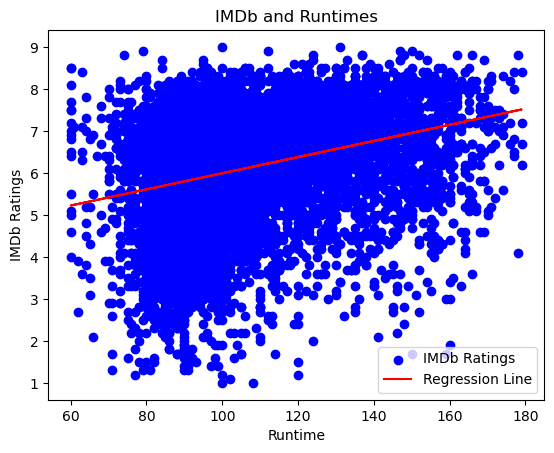

In [175]:
x_values = movie_180['Runtime']
y_values = movie_180['imdbRating']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', label="IMDb Ratings")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.xlabel("Runtime")
plt.ylabel("IMDb Ratings")
plt.title("IMDb and Runtimes")
print(f"The r-squared value is {r_value**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (x_values.min(), y_values.max() - 10), fontsize=15, color="red")
plt.legend()
plt.show()

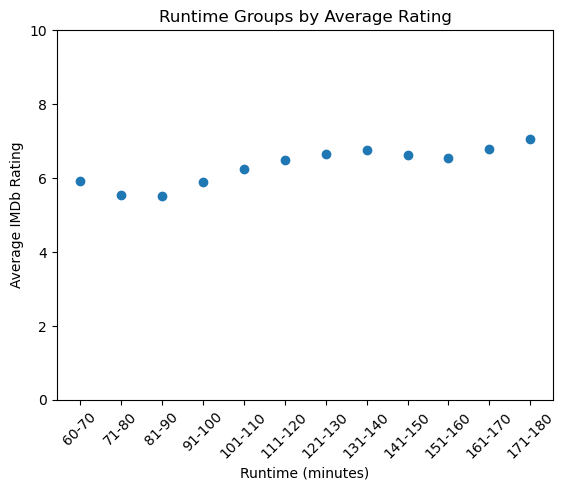

In [176]:
runtime_list = [
    '60-70', '71-80', '81-90', '91-100',
    '101-110', '111-120', '121-130', '131-140',
    '141-150', '151-160', '161-170', '171-180'
]

average_rating = [
    reduced_runtime_0['imdbRating'].mean(),
    reduced_runtime_1['imdbRating'].mean(),
    reduced_runtime_2['imdbRating'].mean(),
    reduced_runtime_3['imdbRating'].mean(),
    reduced_runtime_4['imdbRating'].mean(),
    reduced_runtime_5['imdbRating'].mean(),
    reduced_runtime_6['imdbRating'].mean(),
    reduced_runtime_7['imdbRating'].mean(),
    reduced_runtime_8['imdbRating'].mean(),
    reduced_runtime_9['imdbRating'].mean(),
    reduced_runtime_10['imdbRating'].mean(),
    reduced_runtime_11['imdbRating'].mean()
]

#plot means on graph
plt.scatter(runtime_list, average_rating)
plt.xticks(rotation=45)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDb Rating')
plt.title('Runtime Groups by Average Rating')
plt.ylim(0, 10)
plt.show()

The r-squared value is 0.19236268820972977


/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_47204/1790743169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie['imdbRating'] = cleaned_movie['imdbRating'].astype(float)


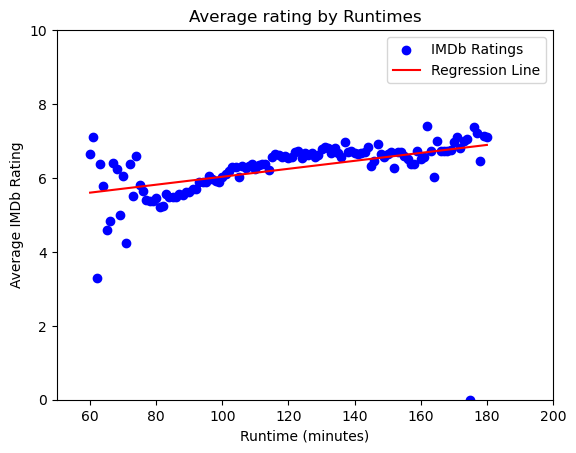

In [194]:
min_list = [i for i in range(60,181)]
min_list
cleaned_movie['imdbRating'] = cleaned_movie['imdbRating'].astype(float)
avg_runtime_list = []
avg_scores_list = []

for i in range(60, 181):
    avg_scores = cleaned_movie.loc[(cleaned_movie['Runtime'] == i), 'imdbRating'].mean()
    
    # Append the runtime
    avg_runtime_list.append(i)
    
    # Check if avg_scores is NaN before appending
    if pd.isna(avg_scores):
        avg_scores_list.append(0)  # or you can choose to append another value or skip
    else:
        avg_scores_list.append(avg_scores)  # Append the average score

# Now use avg_runtime_list and avg_scores_list for the regression
x_values = avg_runtime_list
y_values = avg_scores_list

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = [slope * x + intercept for x in x_values]  # Calculate regression values

plt.scatter(x_values, y_values, color='blue', label="IMDb Ratings") 
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDb Rating')
plt.title('Average rating by Runtimes')
plt.ylim(0, 10)
plt.xlim(50, 200)
print(f"The r-squared value is {r_value**2}")
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.legend()
plt.show()